In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [ ]:
perturb_x = 'Work hours per week'
# capital gain last year quite imbalanced, alot of 0s in ICL for the value of cap gain last year

In [ ]:
df_plot = pd.read_csv(f'/voyager/projects/jacobyhsi/VPUD/df_plot_{perturb_x}.csv')
df_D = pd.read_csv(f'/voyager/projects/jacobyhsi/VPUD/df_D_{perturb_x}.csv')

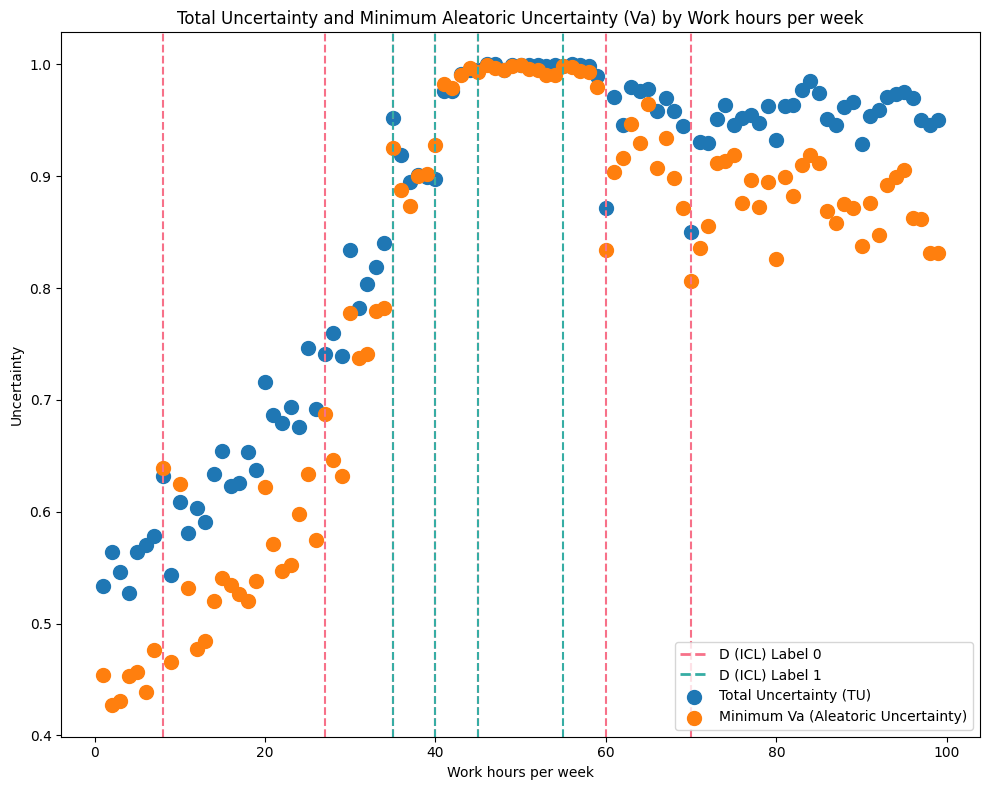

In [31]:
# Scatter plot for uncertainty values
plt.figure(figsize=(10, 8))

plt.scatter(df_plot[f"x_{perturb_x}"], df_plot["TU"], label="Total Uncertainty (TU)", s=100)
plt.scatter(df_plot[f"x_{perturb_x}"], df_plot["Va"], label="Minimum Va (Aleatoric Uncertainty)", s=100)

# Get unique labels dynamically
unique_labels = sorted(df_D["label"].unique())

# Generate distinct colors for each label
colors = sns.color_palette("husl", len(unique_labels))  # Use Husl for visually distinct colors

# Create a dictionary mapping labels to colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Plot axvlines for each label
for label in unique_labels:
    work_hours_values = sorted(df_D[df_D["label"] == label][perturb_x].unique())
    color = label_color_map[label]

    for work_hours in work_hours_values:
        plt.axvline(x=work_hours, color=color, linestyle="--", linewidth=1.5)

# Create custom legend handles for the vertical lines
legend_lines = [
    Line2D([0], [0], color=label_color_map[label], linestyle="--", lw=2, label=f"D (ICL) Label {label}")
    for label in unique_labels
]

# Add legend with both scatter plot labels and axvline labels
plt.legend(handles=legend_lines + plt.gca().get_legend_handles_labels()[0], loc="lower right")

# Labels & Title
plt.xlabel(f"{perturb_x}")
plt.ylabel("Uncertainty")
plt.title(f"Total Uncertainty and Minimum Aleatoric Uncertainty (Va) by {perturb_x}")

plt.tight_layout()

# Save the figure
plt.savefig(f"tabular_plt_{perturb_x}.pdf")
plt.show()

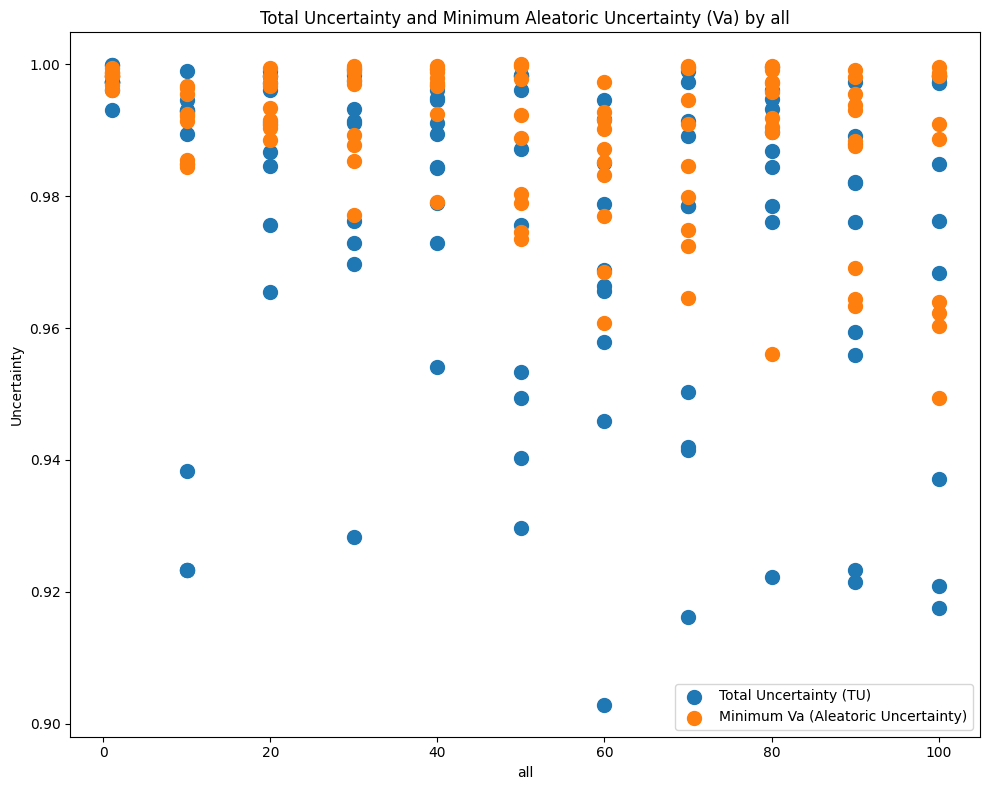

In [6]:
perturb_x = 'all'

df_plot = pd.read_csv(f'/voyager/projects/jacobyhsi/VPUD/df_plot_{perturb_x}.csv')
df_D = pd.read_csv(f'/voyager/projects/jacobyhsi/VPUD/df_D_{perturb_x}.csv')

# Scatter plot for uncertainty values
plt.figure(figsize=(10, 8))

plt.scatter(df_plot[f"radius"], df_plot["TU"], label="Total Uncertainty (TU)", s=100)
plt.scatter(df_plot[f"radius"], df_plot["Va"], label="Minimum Va (Aleatoric Uncertainty)", s=100)

# # Get unique labels dynamically
# unique_labels = sorted(df_D["label"].unique())

# # Generate distinct colors for each label
# colors = sns.color_palette("husl", len(unique_labels))  # Use Husl for visually distinct colors

# # Create a dictionary mapping labels to colors
# label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# # Plot axvlines for each label
# for label in unique_labels:
#     work_hours_values = sorted(df_D[df_D["label"] == label]['radius'].unique())
#     color = label_color_map[label]

#     for work_hours in work_hours_values:
#         plt.axvline(x=work_hours, color=color, linestyle="--", linewidth=1.5)

# # Create custom legend handles for the vertical lines
# legend_lines = [
#     Line2D([0], [0], color=label_color_map[label], linestyle="--", lw=2, label=f"D (ICL) Label {label}")
#     for label in unique_labels
# ]

# Add legend with both scatter plot labels and axvline labels
# plt.legend(handles=legend_lines + plt.gca().get_legend_handles_labels()[0], loc="lower right")
plt.legend(loc='lower right')

# Labels & Title
plt.xlabel(f"{perturb_x}")
plt.ylabel("Uncertainty")
plt.title(f"Total Uncertainty and Minimum Aleatoric Uncertainty (Va) by {perturb_x}")

plt.tight_layout()

# Save the figure
plt.savefig(f"tabular_plt_{perturb_x}.pdf")
plt.show()